In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from sklearn.svm import SVC

In [7]:
with open('../../bases/census.pkl', 'rb') as f:
    X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [8]:
X_census_treinamento.shape, Y_census_treinamento.shape

((27676, 108), (27676,))

In [9]:
X_census_teste.shape, Y_census_teste.shape

((4885, 108), (4885,))

In [10]:
svm_census = SVC(kernel='linear', random_state=1, C = 2.0)

In [11]:
svm_census.fit(X_census_treinamento, Y_census_treinamento)

SVC(C=2.0, kernel='linear', random_state=1)

In [21]:
previsoes = svm_census.predict(X_census_teste)

In [22]:
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [23]:
Y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
accuracy_score(Y_census_teste, previsoes)

0.8509723643807574

In [27]:
confusion_matrix(Y_census_teste, previsoes)

array([[3460,  233],
       [ 495,  697]], dtype=int64)

In [28]:
print(classification_report(Y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      3693
        >50K       0.75      0.58      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885



In [29]:
from yellowbrick.classifier import ConfusionMatrix

0.8509723643807574

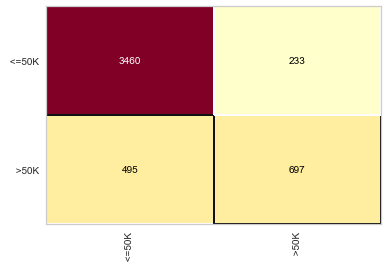

In [30]:
cm = ConfusionMatrix(svm_census)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste)